#Importing libraries and cleaned_df_Eg dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
warnings.filterwarnings("ignore")
df=pd.read_csv('cleaned_df_Eg_Sn.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.025FA0.475MA0.5Pb0.5Sn0.5I3,1.27,0.025,0.475,0.5,0.5,0.5,3.0,0.0
1,Cs0.05FA0.45MA0.5Pb0.5Sn0.5I3,1.26,0.050,0.450,0.5,0.5,0.5,3.0,0.0


#Heatmap

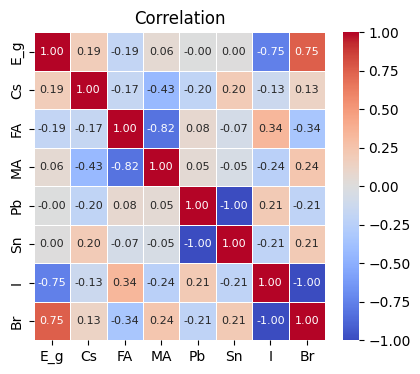

In [3]:
df1=df.iloc[:,1:]
corr_matrix = df1.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(4.7, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,  annot_kws={"size": 8})
plt.title('Correlation')
plt.savefig('Correlation.png')
plt.show()

#Data Prep

In [4]:
dfx=df.iloc[:,2:]
X=dfx.values
y=df.iloc[:,1].values
y=y.reshape(len(y),1)
dfx

,Cs,FA,MA,Pb,Sn,I,Br
0,0.025,0.475,0.50,0.50,0.50,3.00,0.00
1,0.050,0.450,0.50,0.50,0.50,3.00,0.00
2,0.050,0.500,0.45,0.50,0.50,3.00,0.00
3,0.050,0.680,0.26,0.75,0.25,2.60,0.40
4,0.050,0.790,0.16,0.25,0.75,2.50,0.50
...,...,...,...,...,...,...,...
144,0.000,0.000,1.00,0.00,1.00,0.36,2.64
145,0.000,0.000,1.00,0.00,1.00,1.00,2.00
146,0.000,0.000,1.00,0.00,1.00,0.00,3.00
147,0.000,0.000,1.00,0.00,1.00,2.00,1.00


#Ensemble Learning

##Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.15, random_state=100)
rf=RandomForestRegressor()
rf.fit(X_train1,y_train1)

# Calculate cross-validated RMSE
mse_scores1 = cross_val_score(estimator=rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-mse_scores1)
print("RMSE: {:.4f}".format(rmse_scores1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores1.std()))

RMSE: 0.1114
Standard Deviation: 0.0392


In [6]:
#RF on Test set
y_pred1=rf.predict(X_test1)
y_pred1=y_pred1.reshape(len(y_pred1),1)
r_value1 = np.corrcoef(y_test1.squeeze(), y_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test1, y_pred1))
print("R value:", r_value1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred1)))

R2 on Test Set: 0.3608968044795421
R value: 0.789245355907014
MAE on Test Set: 0.08180478260869588
MSE on Test Set: 0.02568083362173944
RMSE on Test Set: 0.16025240597800533


In [7]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train1, y_train_pred1))
print("R value:", r_value_p1)
print("MAE on Train Set:", mean_absolute_error(y_train1, y_train_pred1))
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R2 on Train Set: 0.9568092851296239
R value: 0.9807564750567603
MAE on Train Set: 0.023478412698412898
MSE on Train Set: 0.0015180873126984017
RMSE on Train Set: 0.03896263996058791


In [8]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[2.1  1.9 ]
 [1.4  1.38]
 [1.27 1.25]
 [1.26 1.25]
 [1.51 1.53]
 [1.4  1.28]
 [1.24 1.26]
 [1.25 1.26]
 [1.26 1.22]
 [1.27 1.3 ]
 [1.31 1.31]
 [1.31 1.35]
 [1.52 1.52]
 [1.3  1.29]
 [2.02 1.83]
 [1.21 1.18]
 [1.35 1.44]
 [1.24 1.22]
 [1.35 1.48]
 [1.99 1.32]
 [1.6  1.65]
 [1.43 1.44]
 [1.62 1.77]]


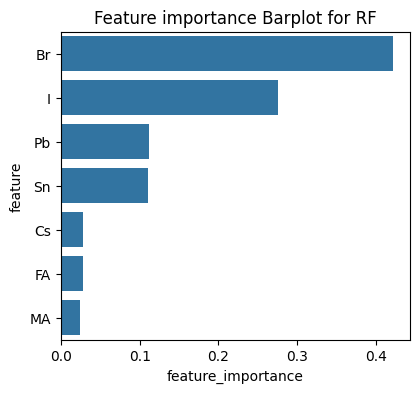

In [9]:
feature_importance = rf.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('Feature importance Barplot for RF')
plt.savefig('Feature importance Barplot for RF.png')

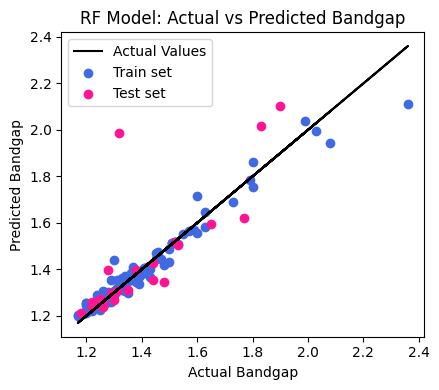

In [10]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred1, color='royalblue', label='Train set')
plt.scatter(y_test1, y_pred1, color='deeppink', label='Test set')

plt.xlabel('Actual Bandgap')
plt.ylabel('Predicted Bandgap')
plt.legend()
#plt.grid(True)
plt.title('RF Model: Actual vs Predicted Bandgap')
#plt.savefig('RF Model: Actual vs Predicted Bandgap.png')

plt.tight_layout()
plt.show()

##Gradient Boosting

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15,  random_state=100)
gbr=GradientBoostingRegressor()
gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE: {:.4f}".format(rmse_scores2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores2.std()))

RMSE: 0.1138
Standard Deviation: 0.0434


In [12]:
#GBR on test set
y_pred2=gbr.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R2 on Test Set: -0.07454465481797556
R value: 0.7526036609388409
MAE on Test Set: 0.10352037751441513
MSE on Test Set: 0.04317800739055535
RMSE on Test Set: 0.20779318417733375


In [13]:
#GBR on train set
y_train_pred2 = gbr.predict(X_train2)
y_train_pred2=y_train_pred2.reshape(len(y_train_pred2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_train2, y_train_pred2))
print("R value:", r_value_p2)
print("MAE on Test Set:", mean_absolute_error(y_train2, y_train_pred2))
print("MSE on Test Set:", mean_squared_error(y_train2, y_train_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred2)))

R2 on Test Set: 0.9733545421304873
R value: 0.9867995462571633
MAE on Test Set: 0.022888781983076624
MSE on Test Set: 0.0009365469326948105
RMSE on Test Set: 0.03060305430336669


In [14]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[2.34 1.9 ]
 [1.38 1.38]
 [1.28 1.25]
 [1.25 1.25]
 [1.49 1.53]
 [1.39 1.28]
 [1.24 1.26]
 [1.26 1.26]
 [1.24 1.22]
 [1.25 1.3 ]
 [1.31 1.31]
 [1.26 1.35]
 [1.51 1.52]
 [1.3  1.29]
 [2.06 1.83]
 [1.22 1.18]
 [1.38 1.44]
 [1.24 1.22]
 [1.35 1.48]
 [2.14 1.32]
 [1.61 1.65]
 [1.37 1.44]
 [1.62 1.77]]


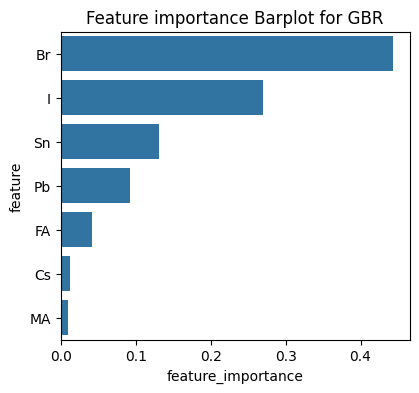

In [15]:
feature_importance = gbr.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('Feature importance Barplot for GBR')
plt.savefig('Feature importance Barplot for GBR.png')

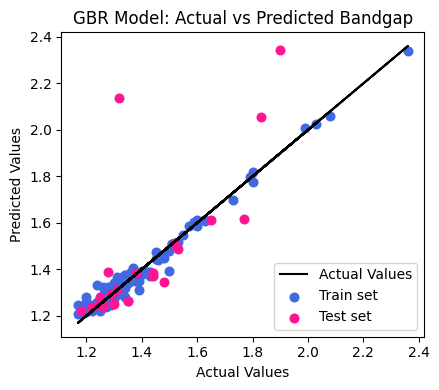

In [16]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set')
plt.scatter(y_test2, y_pred2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)
plt.title('GBR Model: Actual vs Predicted Bandgap')
plt.savefig('GBR Model: Actual vs Predicted Bandgap.png')

plt.tight_layout()
plt.show()

##XGBoost

In [17]:
import xgboost as xgb
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=100)
xgb = xgb.XGBRegressor()
xgb.fit(X_train3,y_train3)

mse_scores3 = cross_val_score(estimator = xgb, X = X_train3, y = y_train3, cv = 5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-mse_scores3)
print("RMSE: {:.4f}".format(rmse_scores3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores3.std()))

RMSE: 0.1419
Standard Deviation: 0.0736


In [18]:
#XGB on Test set
y_pred3=xgb.predict(X_test3)
y_pred3=y_pred3.reshape(len(y_pred3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

R2 on Test Set: -0.04934280693153603
R value: 0.7089120745819164
MAE on Test Set: 0.1094995351459669
RMSE on Test Set: 0.2053419864482839


In [19]:
#XGB on Train set
y_train_pred3 = xgb.predict(X_train3)

y_train_pred3=y_train_pred3.reshape(len(y_train_pred3),1)
r_value_p3 = np.corrcoef(y_train3.squeeze(), y_train_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train3, y_train_pred3))
print("R value:", r_value_p3)
print("MAE on Train Set:", mean_absolute_error(y_train3, y_train_pred3))
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred3)))

R2 on Train Set: 0.9996625878412218
R value: 0.9998356655162753
MAE on Train Set: 0.002303428407699339
MSE on Train Set: 1.1859519318649394e-05
RMSE on Train Set: 0.003443765282165641


In [20]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[2.16 1.9 ]
 [1.38 1.38]
 [1.25 1.25]
 [1.28 1.25]
 [1.48 1.53]
 [1.44 1.28]
 [1.25 1.26]
 [1.27 1.26]
 [1.27 1.22]
 [1.26 1.3 ]
 [1.32 1.31]
 [1.32 1.35]
 [1.51 1.52]
 [1.29 1.29]
 [2.19 1.83]
 [1.19 1.18]
 [1.33 1.44]
 [1.2  1.22]
 [1.35 1.48]
 [2.07 1.32]
 [1.59 1.65]
 [1.4  1.44]
 [1.4  1.77]]


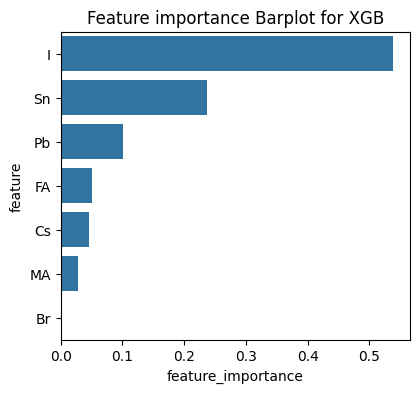

In [21]:
feature_importance = xgb.feature_importances_
feature_names=list(dfx.columns)
num_features=len(feature_names)
dic={'feature':feature_names,'feature_importance':feature_importance}
df_fi=pd.DataFrame(dic)
df_fi=df_fi.sort_values('feature_importance',ascending=False).reset_index()

plt.figure(figsize=(4.5,4))
sns.barplot(data=df_fi.head(30),x='feature_importance',y='feature')
plt.title('Feature importance Barplot for XGB')
plt.savefig('Feature importance Barplot for XGB.png')

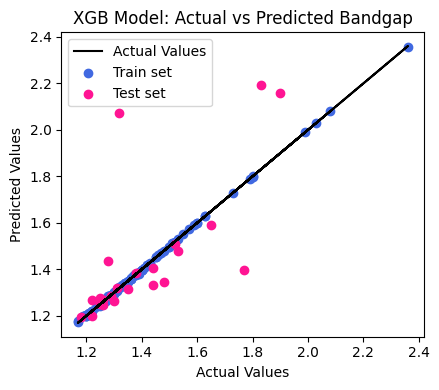

In [22]:
y_train_pred3 = xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred3, color='royalblue', label='Train set')
plt.scatter(y_test3, y_pred3, color='deeppink', label='Test set')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)
plt.title('XGB Model: Actual vs Predicted Bandgap')
plt.savefig('XGB Model: Actual vs Predicted Bandgap.png')

plt.tight_layout()
plt.show()

##CatBoost

In [23]:
from catboost import CatBoostRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.15, random_state=100)
catboost = CatBoostRegressor()
catboost.fit(X_train4, y_train4, verbose=0)

# Evaluating with cross-validation
mse_scores4 = cross_val_score(estimator = catboost, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-mse_scores4)
print("RMSE: {:.4f}".format(rmse_scores4.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores4.std()))

Learning rate set to 0.028456
0:	learn: 0.2020396	total: 510us	remaining: 510ms
1:	learn: 0.1998952	total: 855us	remaining: 427ms
2:	learn: 0.1975298	total: 1.19ms	remaining: 394ms
3:	learn: 0.1949294	total: 1.46ms	remaining: 362ms
4:	learn: 0.1929973	total: 1.81ms	remaining: 361ms
5:	learn: 0.1909943	total: 2.15ms	remaining: 356ms
6:	learn: 0.1889645	total: 2.48ms	remaining: 352ms
7:	learn: 0.1871880	total: 2.91ms	remaining: 361ms
8:	learn: 0.1853237	total: 3.24ms	remaining: 357ms
9:	learn: 0.1832065	total: 3.56ms	remaining: 352ms
10:	learn: 0.1813407	total: 3.9ms	remaining: 350ms
11:	learn: 0.1792093	total: 4.24ms	remaining: 349ms
12:	learn: 0.1777079	total: 4.57ms	remaining: 347ms
13:	learn: 0.1752721	total: 4.92ms	remaining: 346ms
14:	learn: 0.1735799	total: 5.27ms	remaining: 346ms
15:	learn: 0.1718283	total: 6.08ms	remaining: 374ms
16:	learn: 0.1702003	total: 6.49ms	remaining: 375ms
17:	learn: 0.1685600	total: 6.91ms	remaining: 377ms
18:	learn: 0.1672817	total: 7.44ms	remaining: 3

In [24]:
#CB on Test set
y_pred4 = catboost.predict(X_test4)
y_pred4 = y_pred4.reshape(len(y_pred4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred4)))

R2 on Test Set: 0.813320438589119
R value: 0.9126986455973322
MAE on Test Set: 0.05814252244812018
MSE on Test Set: 0.0075012717676494044
RMSE on Test Set: 0.08660988262115013


In [25]:
#CB on Train set
y_train_pred4 = catboost.predict(X_train4)

y_train_pred4=y_train_pred4.reshape(len(y_train_pred4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train4, y_train_pred4))
print("R value:", r_value_p4)
print("MAE on Train Set:", mean_absolute_error(y_train4, y_train_pred4))
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred4)))

R2 on Train Set: 0.9905265217765337
R value: 0.9953599665300048
MAE on Train Set: 0.013623927908533017
MSE on Train Set: 0.0003329782139825851
RMSE on Train Set: 0.018247690647930907


In [26]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[1.9  1.9 ]
 [1.41 1.38]
 [1.26 1.25]
 [1.26 1.25]
 [1.47 1.53]
 [1.42 1.28]
 [1.22 1.26]
 [1.26 1.26]
 [1.27 1.22]
 [1.24 1.3 ]
 [1.33 1.31]
 [1.3  1.35]
 [1.51 1.52]
 [1.3  1.29]
 [2.03 1.83]
 [1.23 1.18]
 [1.35 1.44]
 [1.22 1.22]
 [1.41 1.48]
 [1.57 1.32]
 [1.65 1.65]
 [1.4  1.44]
 [1.63 1.77]]


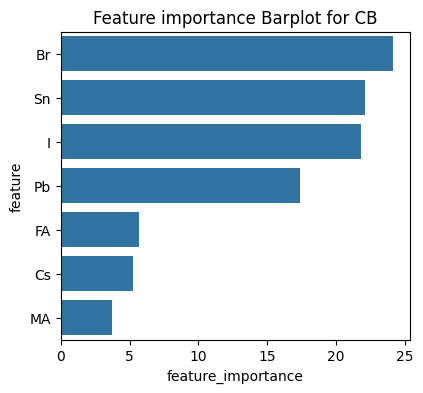

In [27]:
feature_importance = catboost.get_feature_importance()
feature_names = list(dfx.columns)
num_features = len(feature_names)
dic = {'feature': feature_names, 'feature_importance': feature_importance}

# Create a DataFrame with the feature importances
df_fi = pd.DataFrame(dic)
df_fi = df_fi.sort_values('feature_importance', ascending=False).reset_index(drop=True)

# Plot the top 30 feature importances
plt.figure(figsize=(4.5, 4))
sns.barplot(data=df_fi.head(30), x='feature_importance', y='feature')
plt.title('Feature importance Barplot for CB')
plt.savefig('Feature importance Barplot for CB.png')
plt.show()


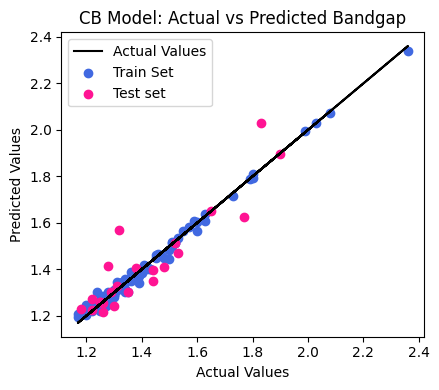

In [28]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred4, color='royalblue', label='Train Set')
plt.scatter(y_test4, y_pred4, color='deeppink', label='Test set')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
#plt.grid(True)
plt.title('CB Model: Actual vs Predicted Bandgap')
plt.savefig('CB Model: Actual vs Predicted Bandgap.png')

plt.tight_layout()
plt.show()

#Hyperparameter tuning using Optuna

##Tuning of RF

In [29]:
import optuna
def objective1(trial):
    # Define the hyperparameters to be optimized
    n_estimators = trial.suggest_int('n_estimators', 100, 2000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])

    # Create the Random Forest model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train1, y_train1, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse

# Create the Optuna study and optimize the objective function
study1 = optuna.create_study(direction='minimize')
study1.optimize(objective1, n_trials=100)

[I 2025-03-26 23:04:30,123] A new study created in memory with name: no-name-5b51c72a-4308-49b2-a305-4c6f80b99a8f
[I 2025-03-26 23:04:33,810] Trial 0 finished with value: 0.1504186357102457 and parameters: {'n_estimators': 733, 'max_depth': 48, 'min_samples_split': 9, 'min_samples_leaf': 12, 'max_features': 'log2'}. Best is trial 0 with value: 0.1504186357102457.
[I 2025-03-26 23:04:37,075] Trial 1 finished with value: 0.1803115248399516 and parameters: {'n_estimators': 1436, 'max_depth': 14, 'min_samples_split': 22, 'min_samples_leaf': 27, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.1504186357102457.
[I 2025-03-26 23:04:39,027] Trial 2 finished with value: 0.1290568958747612 and parameters: {'n_estimators': 157, 'max_depth': 49, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.1290568958747612.
[I 2025-03-26 23:04:40,344] Trial 3 finished with value: 0.1760508972159284 and parameters: {'n_estimators': 225, 'max_depth': 41

In [30]:
# Print the best hyperparameters and the best score
print('Best trial:', study1.best_trial.number)
print("Best hyperparameters: ", study1.best_params)
print("Best RMSE: ", study1.best_value)

Best trial: 71
Best hyperparameters:  {'n_estimators': 762, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Best RMSE:  0.10844000293053936


In [32]:
# Train the model with the best hyperparameters
rf_params = {
    'n_estimators': 762,
    'max_depth': 25,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Initialize the Random Forest model with the defined hyperparameters
best_rf = RandomForestRegressor(**rf_params, random_state=100)
# Calculate cross-validated RMSE
mse_scores_c1 = cross_val_score(estimator=best_rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c1 = np.sqrt(-mse_scores_c1)
print("RMSE: {:.4f}".format(rmse_scores_c1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c1.std()))

RMSE: 0.1030
Standard Deviation: 0.0339


In [33]:
best_rf.fit(X_train1,y_train1)

y_pred_n1=best_rf.predict(X_test1)
y_pred_n1=y_pred1.reshape(len(y_pred1),1)
r_value_n1 = np.corrcoef(y_test1.squeeze(), y_pred_n1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test1, y_pred_n1))
print("R value:", r_value_n1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred_n1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred_n1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred_n1)))

R2 on Test Set: 0.3608968044795421
R value: 0.789245355907014
MAE on Test Set: 0.08180478260869588
MSE on Test Set: 0.02568083362173944
RMSE on Test Set: 0.16025240597800533


##Tuning for Gradient Boosting

In [34]:
import optuna
def objective2(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    # Create the Gradient Boosting model
    model = GradientBoostingRegressor(**params, random_state=100)

    # Perform cross-validation
    score = cross_val_score(model, X_train2, y_train2, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize
study2 = optuna.create_study(direction='minimize')
study2.optimize(objective2, n_trials=100)

[I 2025-03-26 23:07:15,421] A new study created in memory with name: no-name-348d96a4-8fb0-464e-ae60-425129b2dffe
[I 2025-03-26 23:07:16,820] Trial 0 finished with value: 0.14411036811355238 and parameters: {'n_estimators': 529, 'max_depth': 9, 'learning_rate': 0.13972163797643847, 'subsample': 0.9204573348954722, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 0 with value: 0.14411036811355238.
[I 2025-03-26 23:07:17,106] Trial 1 finished with value: 0.11574430566395211 and parameters: {'n_estimators': 122, 'max_depth': 3, 'learning_rate': 0.10972247268930405, 'subsample': 0.921512123213732, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.11574430566395211.
[I 2025-03-26 23:07:19,323] Trial 2 finished with value: 0.13486925807037684 and parameters: {'n_estimators': 921, 'max_depth': 6, 'learning_rate': 0.2071922398587625, 'subsample': 0.6869435922144639, 'min_samples_split': 4, 'min_samples_leaf'

In [35]:
# Print the best hyperparameters and the best score
print('Best trial:', study2.best_trial.number)
print("Best hyperparameters: ", study2.best_params)
print("Best RMSE: ", study2.best_value)

Best trial: 93
Best hyperparameters:  {'n_estimators': 188, 'max_depth': 3, 'learning_rate': 0.04872049514008836, 'subsample': 0.7104968546802328, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}
Best RMSE:  0.10723421619273255


In [36]:
gbr_params = {
    'n_estimators': 188,
    'max_depth': 3,
    'learning_rate': 0.04872049514008836,
    'subsample': 0.7104968546802328,
    'min_samples_split': 2,
    'min_samples_leaf': 8,
    'max_features': None
}
# Train the final model with the best hyperparameters
best_gbr = GradientBoostingRegressor(**gbr_params, random_state=100)
best_gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores_c2 = cross_val_score(estimator=best_gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores_c2 = np.sqrt(-mse_scores_c2)
print("RMSE: {:.4f}".format(rmse_scores_c2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores_c2.std()))

RMSE: 0.1018
Standard Deviation: 0.0336


In [37]:
#TEST set
y_pred_n2=best_gbr.predict(X_test2)
y_pred_n2=y_pred_n2.reshape(len(y_pred_n2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred_n2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred_n2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred_n2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred_n2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred_n2)))

R2 on Test Set: 0.8336289689423997
R value: 0.9165086839664603
MAE on Test Set: 0.05059494746280883
MSE on Test Set: 0.006685222039279748
RMSE on Test Set: 0.08176320712447468


##Tuning of XGBoost

In [38]:
from xgboost import XGBRegressor
def objective3(trial):
    # Define the hyperparameters to be optimized
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 0.5)
    }

    # Create the XGBoost model
    model = XGBRegressor(**params, random_state=100, use_label_encoder=False, eval_metric='rmse')

    # Perform cross-validation
    score = cross_val_score(model, X_train3, y_train3, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
study3 = optuna.create_study(direction='minimize')
study3.optimize(objective3, n_trials=100)

[I 2025-03-26 23:12:06,551] A new study created in memory with name: no-name-cd1d8ebf-2b7b-4efb-97ad-61a928764036
[I 2025-03-26 23:12:06,983] Trial 0 finished with value: 0.12164744552334784 and parameters: {'n_estimators': 616, 'max_depth': 8, 'learning_rate': 0.2861385432053872, 'subsample': 0.9662082860163503, 'min_child_weight': 7, 'colsample_bytree': 0.9214488240694197, 'gamma': 0.04010441623794886}. Best is trial 0 with value: 0.12164744552334784.
[I 2025-03-26 23:12:07,370] Trial 1 finished with value: 0.14384463108369855 and parameters: {'n_estimators': 611, 'max_depth': 10, 'learning_rate': 0.03169354111373729, 'subsample': 0.5536655104031156, 'min_child_weight': 1, 'colsample_bytree': 0.6163880853067109, 'gamma': 0.46830411986445003}. Best is trial 0 with value: 0.12164744552334784.
[I 2025-03-26 23:12:07,643] Trial 2 finished with value: 0.14488373783826775 and parameters: {'n_estimators': 368, 'max_depth': 9, 'learning_rate': 0.14714683711747445, 'subsample': 0.965390718421

In [39]:
# Print the best hyperparameters and the corresponding R2 score
print(f'Best trial: {study3.best_trial.number}')
print(f'Best value (R2): {study3.best_trial.value}')
print(f'Best hyperparameters: {study3.best_trial.params}')

Best trial: 96
Best value (R2): 0.11421486186527847
Best hyperparameters: {'n_estimators': 599, 'max_depth': 7, 'learning_rate': 0.07511905915317327, 'subsample': 0.6372554728945663, 'min_child_weight': 7, 'colsample_bytree': 0.5217341758360481, 'gamma': 0.023812893066876083}


In [40]:
xgb_params = {
    'n_estimators': 599,
    'max_depth': 7,
    'learning_rate': 0.07511905915317327,
    'subsample': 0.6372554728945663,
    'colsample_bytree': 0.5217341758360481,
    'min_child_weight': 7,
    'gamma': 0.023812893066876083
}
# Train the final model with the best hyperparameters
best_xgb = XGBRegressor(**xgb_params, random_state=100)
best_xgb.fit(X_train3, y_train3)

# Evaluating with cross-validation
mse_scores = cross_val_score(best_xgb, X_train3, y_train3, cv=5,  scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
print("RMSE: {:.4f}".format(rmse_scores.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores.std()))

RMSE: 0.1092
Standard Deviation: 0.0334


In [41]:
y_pred_n3=best_xgb.predict(X_test3)
y_pred_n3=y_pred_n3.reshape(len(y_pred_n3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred_n3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred_n3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred_n3))
print("MSE on Test Set:", mean_squared_error(y_test3, y_pred_n3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred_n3)))

R2 on Test Set: 0.7927157982285961
R value: 0.8947145418721978
MAE on Test Set: 0.05571176985035772
MSE on Test Set: 0.008329219968570934
RMSE on Test Set: 0.09126456030996333


##Tuning of CatBoost

In [42]:
import optuna
def objective4(trial):
    # Define the hyperparameters to be optimized
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10, log=True),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        'od_wait': trial.suggest_int('od_wait', 10, 50)
    }

    # Create the CatBoost model
    model = CatBoostRegressor(
        **params,
        logging_level='Silent',
        random_seed=100
    )

    # Perform cross-validation
    score = cross_val_score(model, X_train4, y_train4, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score.mean())

    return rmse
# Create the Optuna study and optimize the objective function
study4 = optuna.create_study(direction='minimize')
study4.optimize(objective4, n_trials=100)

[I 2025-03-26 23:14:07,953] A new study created in memory with name: no-name-a2d3b1c1-4ff5-49fc-9e4e-2042534bca44
[I 2025-03-26 23:14:09,985] Trial 0 finished with value: 0.12899422290347726 and parameters: {'iterations': 308, 'depth': 9, 'learning_rate': 0.09113770200161979, 'l2_leaf_reg': 0.5516493255733939, 'bagging_temperature': 0.21524047188865392, 'random_strength': 0.00210881242666343, 'border_count': 120, 'od_type': 'Iter', 'od_wait': 16}. Best is trial 0 with value: 0.12899422290347726.
[I 2025-03-26 23:14:14,448] Trial 1 finished with value: 0.11671584109073926 and parameters: {'iterations': 770, 'depth': 9, 'learning_rate': 0.02715481497378951, 'l2_leaf_reg': 2.8703399401991354, 'bagging_temperature': 0.9454820439632579, 'random_strength': 2.2174704969218106e-07, 'border_count': 112, 'od_type': 'Iter', 'od_wait': 45}. Best is trial 1 with value: 0.11671584109073926.
[I 2025-03-26 23:14:16,245] Trial 2 finished with value: 0.11691391059052506 and parameters: {'iterations': 72

In [43]:
# Print the best hyperparameters and the best score
print(f'Best trial: {study4.best_trial.number}')
print("Best hyperparameters: ", study4.best_params)
print("Best RMSE: ", study4.best_value)

Best trial: 75
Best hyperparameters:  {'iterations': 479, 'depth': 6, 'learning_rate': 0.040025866886087814, 'l2_leaf_reg': 4.942448611471461, 'bagging_temperature': 0.05868643104871664, 'random_strength': 1.3397492833995565e-09, 'border_count': 17, 'od_type': 'Iter', 'od_wait': 34}
Best RMSE:  0.10961422092001945


In [44]:
# Train the model with the best hyperparameters
best_cb = CatBoostRegressor(
    iterations=479,
    depth=6,
    learning_rate=0.040025866886087814,
    l2_leaf_reg=4.942448611471461,
    bagging_temperature=0.05868643104871664,
    random_strength=1.3397492833995565e-09,
    border_count=17,
    od_type='Iter',
    od_wait=34,
    random_seed=100
)
best_cb.fit(X_train4, y_train4, verbose=0)

mse_scores = cross_val_score(estimator = best_cb, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
print("RMSE: {:.4f}".format(rmse_scores.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores.std()))

0:	learn: 0.2013048	total: 468us	remaining: 224ms
1:	learn: 0.1979158	total: 830us	remaining: 198ms
2:	learn: 0.1946410	total: 1.15ms	remaining: 183ms
3:	learn: 0.1914495	total: 1.5ms	remaining: 179ms
4:	learn: 0.1884368	total: 1.89ms	remaining: 179ms
5:	learn: 0.1854462	total: 2.26ms	remaining: 178ms
6:	learn: 0.1825039	total: 2.58ms	remaining: 174ms
7:	learn: 0.1802899	total: 2.92ms	remaining: 172ms
8:	learn: 0.1774878	total: 3.25ms	remaining: 170ms
9:	learn: 0.1747787	total: 3.55ms	remaining: 166ms
10:	learn: 0.1721432	total: 3.88ms	remaining: 165ms
11:	learn: 0.1701155	total: 4.2ms	remaining: 163ms
12:	learn: 0.1681296	total: 4.51ms	remaining: 162ms
13:	learn: 0.1656702	total: 4.86ms	remaining: 161ms
14:	learn: 0.1637568	total: 5.19ms	remaining: 161ms
15:	learn: 0.1614186	total: 5.5ms	remaining: 159ms
16:	learn: 0.1596585	total: 5.83ms	remaining: 159ms
17:	learn: 0.1579170	total: 6.16ms	remaining: 158ms
18:	learn: 0.1561938	total: 6.46ms	remaining: 157ms
19:	learn: 0.1543054	total:

In [45]:
y_pred_n4 = best_cb.predict(X_test4)
y_pred_n4 = y_pred_n4.reshape(len(y_pred_n4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred_n4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred_n4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred_n4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred_n4)))

R2 on Test Set: 0.7283852336044523
R value: 0.8717969658524739
MAE on Test Set: 0.06792659513226836
MSE on Test Set: 0.010914189874033272
RMSE on Test Set: 0.10447100015809781


In [46]:
print(np.concatenate((y_pred_n4.reshape(len(y_pred_n4),1), y_test4.reshape(len(y_test4),1)),1))

[[1.99 1.9 ]
 [1.38 1.38]
 [1.27 1.25]
 [1.25 1.25]
 [1.43 1.53]
 [1.39 1.28]
 [1.22 1.26]
 [1.26 1.26]
 [1.28 1.22]
 [1.26 1.3 ]
 [1.33 1.31]
 [1.31 1.35]
 [1.5  1.52]
 [1.3  1.29]
 [1.94 1.83]
 [1.22 1.18]
 [1.37 1.44]
 [1.25 1.22]
 [1.38 1.48]
 [1.69 1.32]
 [1.61 1.65]
 [1.39 1.44]
 [1.57 1.77]]


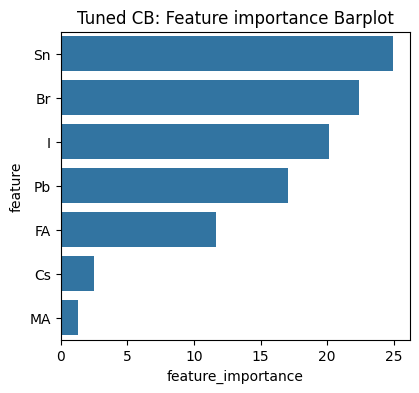

In [47]:
feature_importance = best_cb.get_feature_importance()
feature_names = list(dfx.columns)
num_features = len(feature_names)
dic = {'feature': feature_names, 'feature_importance': feature_importance}

# Create a DataFrame with the feature importances
df_fi = pd.DataFrame(dic)
df_fi = df_fi.sort_values('feature_importance', ascending=False).reset_index(drop=True)

# Plot the top 30 feature importances
plt.figure(figsize=(4.5, 4))
sns.barplot(data=df_fi.head(30), x='feature_importance', y='feature')
plt.title('Tuned CB: Feature importance Barplot')
plt.savefig('Tuned CB: Feature importance Barplot.png')
plt.show()


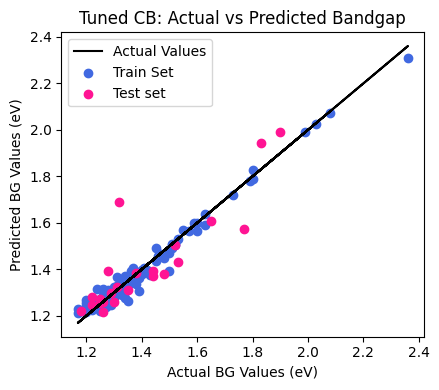

In [48]:
# Plotting the result for the training set
y_train_pred_n4 = best_cb.predict(X_train4)
plt.figure(figsize=(4.5, 4))
plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred_n4, color='royalblue', label='Train Set')
plt.scatter(y_test4, y_pred_n4, color='deeppink', label='Test set')

plt.xlabel('Actual BG Values (eV)')
plt.ylabel('Predicted BG Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Tuned CB: Actual vs Predicted Bandgap')
plt.savefig('Tuned CB: Actual vs Predicted Bandgap.png')

plt.tight_layout()
plt.show()

#SHAP Analysis

In [49]:
import shap
shap.initjs()

In [50]:
dfx.shape

(149, 7)

In [51]:
col=dfx.columns
dfx_test = pd.DataFrame(data=X_train4, columns=col)

In [52]:
explainer=shap.Explainer(best_cb)
shap_values=explainer(dfx_test[0:500])

In [53]:
np.shape(shap_values.values)

(126, 7)

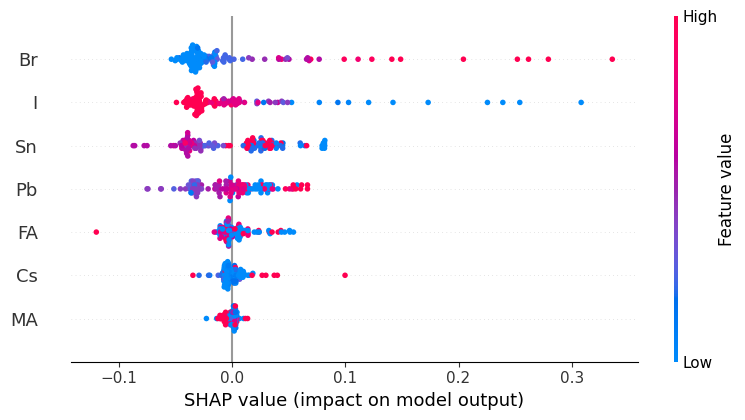

In [54]:
plt.figure(figsize=(10, 3))
shap.summary_plot(shap_values)
plt.show()

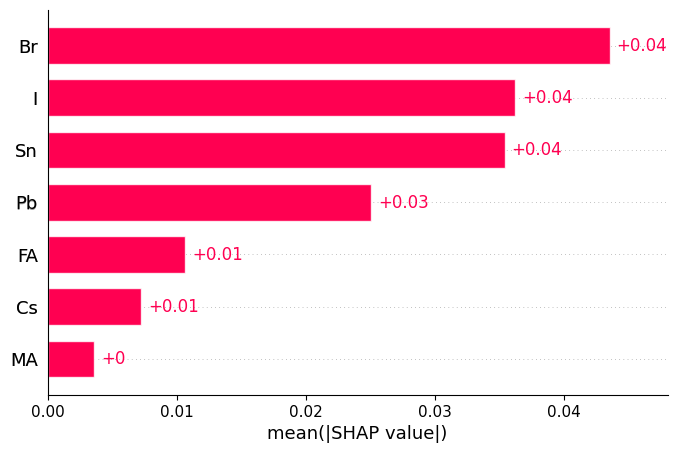

In [55]:
plt.figure(figsize=(5, 3))
shap.plots.bar(shap_values)
plt.show()